Loaded model from disk
Found 7178 images belonging to 7 classes.
113/113 [==============================] - 21s 185ms/step
Accuracy: 0.16675954304820284
Confusion Matrix:
[[123  13 151 212 153 197 109]
 [ 13   1  19  16  13  25  24]
 [134  17 131 252 168 199 123]
 [220  28 243 428 297 344 214]
 [187   9 158 295 195 242 147]
 [167  15 164 307 212 233 149]
 [109   6 132 204 119 175  86]]
Precision: 0.16708184877325732
Recall: 0.16675954304820284
F1-Score: 0.1667458479988923


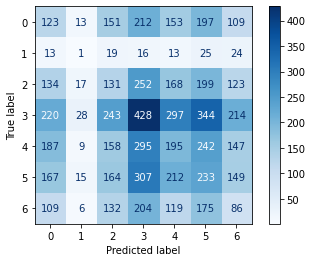

              precision    recall  f1-score   support

       Angry       0.13      0.13      0.13       958
   Disgusted       0.01      0.01      0.01       111
     Fearful       0.13      0.13      0.13      1024
       Happy       0.25      0.24      0.25      1774
     Neutral       0.17      0.16      0.16      1233
         Sad       0.16      0.19      0.18      1247
   Surprised       0.10      0.10      0.10       831

    accuracy                           0.17      7178
   macro avg       0.14      0.14      0.14      7178
weighted avg       0.17      0.17      0.17      7178



In [3]:
import numpy as np
from keras.models import model_from_json
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score

emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# load json and create model
json_file = open('emotion_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

# load weights into new model
emotion_model.load_weights("emotion_model.h5")
print("Loaded model from disk")

# Initialize image data generator with rescaling
test_data_gen = ImageDataGenerator(rescale=1./255)

# Preprocess all test images
test_generator = test_data_gen.flow_from_directory(
        'test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')
# do prediction on test data
predictions = emotion_model.predict(test_generator)

# Get predicted labels
predicted_labels = np.argmax(predictions, axis=1)

# True labels
true_labels = test_generator.classes

# Calculate accuracy
accuracy = np.sum(predicted_labels == true_labels) / len(true_labels)
print("Accuracy:", accuracy)

# Calculate confusion matrix
c_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(c_matrix)

precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Display confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=emotion_dict)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

# Classification report
print(classification_report(true_labels, predicted_labels, target_names=emotion_dict.values()))
